# Comparing EM with GD for Gaussian mixtures (initialized from a one-cluster point)

In [33]:
## choosing parameters for mixture of gaussians
import numpy as np
m = n = 2
gPi = np.random.rand(m)
gPi = gPi / np.sum(gPi)
gMu = np.random.rand(m, n)
gMu[1] = -gMu[0]

In [34]:
print("gPi: ", gPi)
print("gMu: ", gMu)

gPi:  [0.8535 0.1465]
gMu:  [[ 0.1366  0.7899]
 [-0.1366 -0.7899]]


In [36]:
# choosing the number of samples
samples = 20000
data = np.zeros((samples, 2))
# sampling from the generating distribution
for _ in range(samples):
    t = np.random.rand()
    if t < gPi[0]:
        data[_] = np.random.multivariate_normal(gMu[0], np.eye(n), 1)
    else:
        data[_] = np.random.multivariate_normal(gMu[1], np.eye(n), 1)

In [37]:
# def a multivariate gaussian with identity covariance
def gaussian(x, y, n):
    result = 1.0
    for _ in range(n):
        result *= np.exp(-(x[_] - y[_])**2/2.0)
    return result

In [19]:
# def a mixture of Gaussians
def gmm(pi, Mu, x, m, n):
    result = 0.0
    for _ in range(m):
       result += pi[_] * gaussian(x, Mu[_], n)  
    return result

In [38]:
# initial parameters
iPi = np.array([0.0001, 0.9999])
iMu = (np.random.rand(m, n) * 2 - 1)
# running parameters
Pi = np.copy(iPi)
Mu = np.copy(iMu)

## EM algorithm

In [39]:
# number of iterations
iteration = 100 
loss = np.zeros(iteration)
pis = np.zeros(iteration)
# Zc is the partition function vector
for itts in range(iteration):
    # compute Z_c and E_{q_c}[x]
    Zc = np.zeros(m)
    Zcx = np.zeros((m, n))
    for c in range(m):
        for i in range(samples):
            x = data[i]
            Zcx[c] += np.multiply(x, (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n)))
            Zc[c] += (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n))
    Zc /= samples
    Zcx /= samples
    # update parameters
    print("Zc: ", Zc, "Pi: ", Pi)
    for _ in range(m):
        Pi[_] *= Zc[_]
        Mu[_] = Zcx[_] / Zc[_]
    pis[itts] = Pi[0]
    cross_entropy = 0.0
    for i in range(samples):
        x = data[i]
        cross_entropy += -np.log(gmm(Pi, Mu, x, m, n))
    cross_entropy /= samples
    loss[itts] = cross_entropy

Zc:  [3.8279 0.9997] Pi:  [0.0001 0.9999]
Zc:  [1.2207 0.9999] Pi:  [0.0004 0.9996]
Zc:  [1.2779 0.9999] Pi:  [0.0005 0.9995]
Zc:  [1.3317 0.9998] Pi:  [0.0006 0.9994]
Zc:  [1.3649 0.9997] Pi:  [0.0008 0.9992]
Zc:  [1.3615 0.9996] Pi:  [0.0011 0.9989]
Zc:  [1.3274 0.9995] Pi:  [0.0015 0.9985]
Zc:  [1.2852 0.9994] Pi:  [0.002 0.998]
Zc:  [1.2492 0.9994] Pi:  [0.0025 0.9975]
Zc:  [1.2223 0.9993] Pi:  [0.0031 0.9969]
Zc:  [1.2021 0.9992] Pi:  [0.0038 0.9962]
Zc:  [1.1863 0.9991] Pi:  [0.0046 0.9954]
Zc:  [1.1732 0.999 ] Pi:  [0.0055 0.9945]
Zc:  [1.162  0.9989] Pi:  [0.0064 0.9936]
Zc:  [1.1521 0.9989] Pi:  [0.0075 0.9925]
Zc:  [1.1432 0.9988] Pi:  [0.0086 0.9914]
Zc:  [1.1352 0.9987] Pi:  [0.0099 0.9901]
Zc:  [1.1278 0.9986] Pi:  [0.0112 0.9888]
Zc:  [1.121  0.9985] Pi:  [0.0126 0.9874]
Zc:  [1.1147 0.9984] Pi:  [0.0141 0.9859]
Zc:  [1.1089 0.9983] Pi:  [0.0158 0.9842]
Zc:  [1.1036 0.9982] Pi:  [0.0175 0.9825]
Zc:  [1.0986 0.9981] Pi:  [0.0193 0.9807]
Zc:  [1.094 0.998] Pi:  [0.0212 0.97

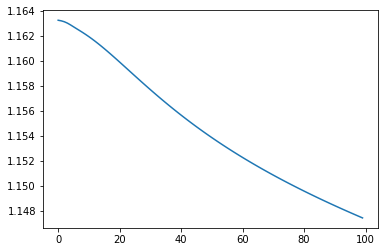

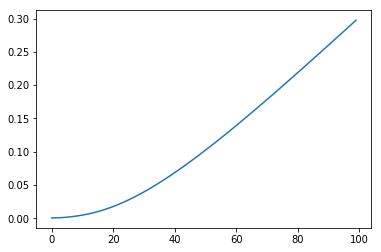

In [40]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.plot(loss)
plt.show()
plt.plot(pis)
plt.show()## EM algorithm

## GD algorithm

In [41]:
avg = np.mean(data, axis = 0)

In [42]:
import nbm
# go back to the same initialization
Pi = np.copy(iPi)
Mu = np.copy(iMu)
Mu[1] = avg
# set the step size
ss = 0.01
# number of iterations
iteration = 100
loss_gd = np.zeros(iteration)
pis_gd = np.zeros(iteration)
# Zc is the partition function vector
for itts in range(iteration):
    # compute Z_c and E_{q_c}[x]
    # the computations for Zc, Zcx are the same
    oldPi = np.copy(Pi)
    oldMu = np.copy(Mu)
    Zc = np.zeros(m)
    Zcx = np.zeros((m, n))
    for c in range(m):
        for i in range(samples):
            x = data[i]
            Zcx[c] += np.multiply(x, (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n)))
            Zc[c] += (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n))
    Zc /= samples
    Zcx /= samples
    # the only difference is in updating parameters
    for _ in range(m):
        Pi[_] += ss * Zc[_]
        Mu[_] += ss * oldPi[_] * ( (Zcx[_] / Zc[_]) - oldMu[_]) * Zc[_]
    # do the projection, no need to project Mu now
    Pi = nbm.project(Pi)
    # print (use it for debugging)
    print("Zc: ", Zc, "Pi: ", Pi)
    pis_gd[itts] = Pi[0]
    cross_entropy = 0.0
    for i in range(samples):
        x = data[i]
        cross_entropy += -np.log(gmm(Pi, Mu, x, m, n))
    cross_entropy /= samples
    loss_gd[itts] = cross_entropy

Zc:  [1.0042 1.    ] Pi:  [0.0001 0.9999]
Zc:  [1.0041 1.    ] Pi:  [0.0001 0.9999]
Zc:  [1.0041 1.    ] Pi:  [0.0002 0.9998]
Zc:  [1.0041 1.    ] Pi:  [0.0002 0.9998]
Zc:  [1.0041 1.    ] Pi:  [0.0002 0.9998]
Zc:  [1.004 1.   ] Pi:  [0.0002 0.9998]
Zc:  [1.004 1.   ] Pi:  [0.0002 0.9998]
Zc:  [1.004 1.   ] Pi:  [0.0003 0.9997]
Zc:  [1.0039 1.    ] Pi:  [0.0003 0.9997]
Zc:  [1.0039 1.    ] Pi:  [0.0003 0.9997]
Zc:  [1.0039 1.    ] Pi:  [0.0003 0.9997]
Zc:  [1.0039 1.    ] Pi:  [0.0003 0.9997]
Zc:  [1.0038 1.    ] Pi:  [0.0004 0.9996]
Zc:  [1.0038 1.    ] Pi:  [0.0004 0.9996]
Zc:  [1.0038 1.    ] Pi:  [0.0004 0.9996]
Zc:  [1.0038 1.    ] Pi:  [0.0004 0.9996]
Zc:  [1.0037 1.    ] Pi:  [0.0004 0.9996]
Zc:  [1.0037 1.    ] Pi:  [0.0005 0.9995]
Zc:  [1.0037 1.    ] Pi:  [0.0005 0.9995]
Zc:  [1.0037 1.    ] Pi:  [0.0005 0.9995]
Zc:  [1.0036 1.    ] Pi:  [0.0005 0.9995]
Zc:  [1.0036 1.    ] Pi:  [0.0005 0.9995]
Zc:  [1.0036 1.    ] Pi:  [0.0005 0.9995]
Zc:  [1.0036 1.    ] Pi:  [0.0006 0.9994

## Comparing the escape rate for EM and GD

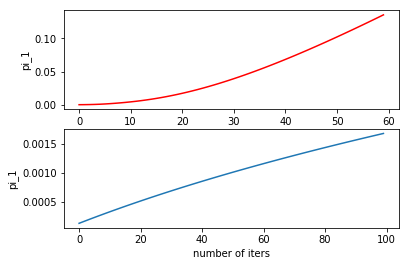

In [47]:
plt.subplot(211)
plt.xlabel("number of iters")
plt.ylabel("pi_1")
plt.plot(pis[:60], 'r')
plt.subplot(212)
plt.plot(pis_gd)
plt.xlabel("number of iters")
plt.ylabel("pi_1")
plt.savefig('em_vs_gd_gmm.png')
plt.show()## EM algorithm